In [25]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import fixed_portfolio
importlib.reload(fixed_portfolio)

<module 'src.fixed_portfolio' from '/Users/K/works/git/decumulation4/src/fixed_portfolio.py'>

In [26]:
# 各資産の年率期待リターン
mu_assets = {
    "asset0": 1.43*1e-02,
    "asset1": 5.19*1e-02,
    "asset2": 3.46*1e-02,
    "asset3": 0.86*1e-02,
    "asset4": 5.95*1e-02,
    "asset5": 2.67*1e-02,
    "asset6": 5.84*1e-02,
    "asset7": 7.28*1e-02,
    "asset8": 0,
}
# 各資産の年率期待リスク
sig_assets = {
    "asset0": np.sqrt(2.36*1e-02),
    "asset1": np.sqrt(14.60*1e-02),
    "asset2": np.sqrt(7.48*1e-02),
    "asset3": np.sqrt(4.75*1e-02),
    "asset4": np.sqrt(17.13*1e-02),
    "asset5": np.sqrt(14.45*1e-02),
    "asset6": np.sqrt(14.46*1e-02),
    "asset7": np.sqrt(18.99*1e-02),
    "asset8": 0,
}

Sig = np.array([
    [0.056*1e-02, -0.034*1e-02, 0.012*1e-02, 0.056*1e-02, 0.002*1e-02, 0.053*1e-02, 0.065*1e-02, 0.073*1e-02, 0.000*1e-02],
    [-0.034*1e-02, 2.130*1e-02, 0.520*1e-02, -0.100*1e-02, 1.939*1e-02, 1.332*1e-02, 0.970*1e-02, 1.584*1e-02, 0.000*1e-02],
    [0.012*1e-02, 0.520*1e-02, 0.560*1e-02, -0.014*1e-02, 0.786*1e-02, 0.223*1e-02, 0.207*1e-02, 0.674*1e-02, 0.000*1e-02],
    [0.056*1e-02, -0.100*1e-02, -0.014*1e-02, 0.226*1e-02, -0.132*1e-02, 0.166*1e-02, 0.012*1e-02, 0.086*1e-02, 0.000*1e-02],
    [0.002*1e-02, 1.939*1e-02, 0.786*1e-02, -0.132*1e-02, 2.935*1e-02, 1.919*1e-02, 1.104*1e-02, 2.576*1e-02, 0.000*1e-02],
    [0.053*1e-02, 1.332*1e-02, 0.223*1e-02, 0.166*1e-02, 1.919*1e-02, 2.087*1e-02, 0.909*1e-02, 2.002*1e-02, 0.000*1e-02],
    [0.065*1e-02, 0.970*1e-02, 0.207*1e-02, 0.012*1e-02, 1.104*1e-02, 0.909*1e-02, 2.090*1e-02, 1.389*1e-02, 0.000*1e-02],
    [0.073*1e-02, 1.584*1e-02, 0.674*1e-02, 0.086*1e-02, 2.576*1e-02, 2.002*1e-02, 1.389*1e-02, 3.606*1e-02, 0.000*1e-02],
    [0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02, 0.000*1e-02],
])

In [27]:
# 各リスク許容度RTごとのポートフォリオのボラティリティと期待リターンとアロケーション
weights = pd.DataFrame()
weights["RT"] = np.arange(0, 10, 1)
weights["Vol"] = [0, 0.0243, 0.0326, 0.0431, 0.0586, 0.0735, 0.0891, 0.1076, 0.1199, 0.1291]
weights["E[r]"] = [0.0001, 0.0165, 0.0214, 0.0274, 0.0335, 0.039, 0.0439, 0.0491, 0.053, 0.0556]
weights["asset0"] = [0, 0.2, 0.26, 0.3, 0.23, 0.18, 0.13, 0.07, 0.03, 0]
weights["asset1"] = [0, 0.06, 0.09, 0.1, 0.13, 0.16, 0.18, 0.21, 0.23, 0.24]
weights["asset2"] = [0, 0.14, 0.18, 0.23, 0.22, 0.2, 0.19, 0.16, 0.15, 0.11]
weights["asset3"] = [0, 0.16, 0.2, 0.24, 0.19, 0.14, 0.09, 0.04, 0, 0]
weights["asset4"] = [0, 0.02, 0.02, 0.03, 0.08, 0.12, 0.17, 0.22, 0.25, 0.29]
weights["asset5"] = [0, 0, 0, 0, 0, 0, 0.01, 0.04, 0.05, 0.05]
weights["asset6"] = [0, 0.04, 0.06, 0.08, 0.1, 0.12, 0.12, 0.12, 0.13, 0.13]
weights["asset7"] = [0, 0, 0, 0.02, 0.05, 0.08, 0.11, 0.14, 0.16, 0.18]
weights["asset8"] = [1, 0.38, 0.19, 0, 0, 0, 0, 0, 0, 0]

In [28]:
# ---- Simulation helpers ----
def annual_to_period_params(mu_a: float, sig_a: float, periods_per_year: int, model: str = "gaussian"):
    P = periods_per_year
    if model == "gaussian":
        mu_p = mu_a / P
        sig_p = sig_a / np.sqrt(P)
        return mu_p, sig_p
    elif model == "gbm":
        mu_log_p = np.log(1.0 + mu_a) / P
        sig_log_p = sig_a / np.sqrt(P)
        return mu_log_p, sig_log_p
    else:
        raise ValueError("model must be 'gaussian' or 'gbm'")

def simulate_returns(mu_dict, sig_dict, n_periods=120, freq="M", model="gaussian", corr=None, seed=42):
    rng = np.random.default_rng(seed)
    assets = list(mu_dict.keys())
    n = len(assets)
    if freq == "M":
        P = 12
    elif freq == "W":
        P = 52
    elif freq == "D":
        P = 252
    else:
        raise ValueError("freq must be one of 'M', 'W', 'D'")

    if corr is None:
        R = np.eye(n)
    else:
        R = corr.reindex(index=assets, columns=assets).to_numpy()

    if model == "gaussian":
        mu_p = np.array([annual_to_period_params(mu_dict[a], sig_dict[a], P, "gaussian")[0] for a in assets])
        sig_p = np.array([annual_to_period_params(mu_dict[a], sig_dict[a], P, "gaussian")[1] for a in assets])
        D = np.diag(sig_p)
        cov = D @ R @ D
        shocks = rng.multivariate_normal(mean=np.zeros(n), cov=cov, size=n_periods)
        rets = shocks + mu_p
    else:
        mu_log_p = np.array([annual_to_period_params(mu_dict[a], sig_dict[a], P, "gbm")[0] for a in assets])
        sig_log_p = np.array([annual_to_period_params(mu_dict[a], sig_dict[a], P, "gbm")[1] for a in assets])
        D = np.diag(sig_log_p)
        cov_log = D @ R @ D
        eps = rng.multivariate_normal(mean=np.zeros(n), cov=cov_log, size=n_periods)
        rets = np.exp(mu_log_p + eps) - 1.0

    idx = pd.date_range(start="2005-01-31", periods=n_periods, freq=freq)
    df = pd.DataFrame(rets, index=idx, columns=assets)
    return df

# ---- Run a default simulation (monthly, 10 years = 120 periods) ----
df_returns = simulate_returns(mu_assets, sig_assets, n_periods=120, freq="M", model="gaussian", corr=None, seed=123)

In [29]:
# ブートストラップ法でリサンプリング
def bootstrap(rets, n_steps):
    return rets.sample(n_steps, replace=True).values

In [30]:
INIT_VAL = 100
WITHDRAWAL_RATE = 0.03 / 12 # per month
RT = 3
N_STEPS = 12 * 35 # month
N_PATHS = 10
AGE = np.arange(65, 100+1/12, 1/12)

rets = bootstrap(df_returns, n_steps=N_STEPS)

In [31]:
model = fixed_portfolio.FixedPortfolio(weights)

In [37]:
from scipy.stats import norm 
def get_const_scenario(weights, rt, init_val, n_steps, schedule_mode, q=0.5):   
        dt = 1/12
        sigma = weights.iloc[:, 1].values     
        mu = weights.iloc[:, 2].values

        if schedule_mode == "mean":
            g = (1.0 + mu[rt]) ** dt
        elif schedule_mode == "median":
            g = float(np.exp((mu[rt] - 0.5 * sigma[rt]**2) * dt))
        else:
            raise ValueError("schedule_mode must be 'mean' or 'median'")
        
        if abs(g - 1.0) < 1e-12:
            A = init_val / n_steps
        else:
            A = ( (g**n_steps) * init_val * (g - 1.0) ) / ( (g**n_steps) - 1.0 )
        
        S_hat = np.zeros(n_steps + 1)
        S_hat[0] = init_val
        for t in range(1, n_steps + 1):
            S_hat[t] = g * S_hat[t-1] - A
        
        return S_hat, float(A)

_, W = get_const_scenario(weights, RT, INIT_VAL, N_STEPS+1, schedule_mode="median")
WITHDRAWAL_RATE = W / INIT_VAL

In [38]:
WITHDRAWAL_RATE

0.00365060408006099

In [39]:
S, _, _ = model.run(
    rets=rets,
    init_rt=RT,
    init_val=INIT_VAL,
    contribution=0,
    withdrawal=WITHDRAWAL_RATE*INIT_VAL,
    const=True
)

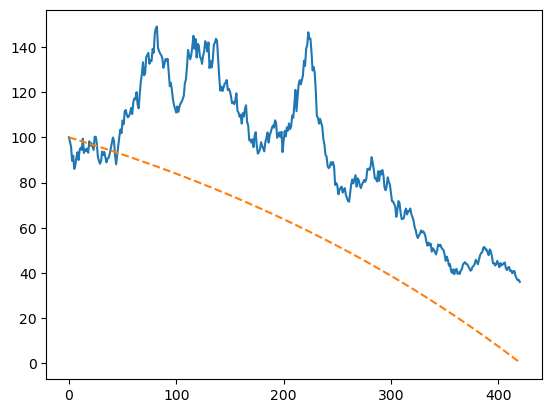

In [40]:
plt.plot(S)
plt.plot(model.scenario, ls="--")
plt.show()